In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

**Extraction**

In [ ]:
base_url = "https://letterboxd.com/film/the-lord-of-the-rings-the-return-of-the-king/reviews/"
pages = 5
all_reviews = scrape_reviews(base_url,pages)

Scraping page 1: https://letterboxd.com/film/the-lord-of-the-rings-the-return-of-the-king/reviews/
★★★★★     Rewatched by jasperdixon  25 Nov 2024      Okay maybe the extended edition is too long….
★★★★     Watched by Guylian_  08 Apr 2024      FRODO FOR HEAVEN'S SAKE !
★★★★★      Watched by Cheryl  25 Nov 2024      ثلاثية القرن 👆🏻
★★★★★      Rewatched by Flash  25 Nov 2024      How did I not give this 5 stars before? I suck eggs.
★★★★★     Watched by Milfzilla  25 Nov 2024      saurons mund 🫦
★★★★★      Rewatched by scoutbrodsky  23 Nov 2024      the best ever pt. 3
★★★★★     Watched by gaspardmgt  25 Nov 2024      Frisson
★★★★★      Watched by PascalKantor  24 Nov 2024  2     Für mich der emotionalsten mitreißendste der drei Filme. Absolute Gänsehaut im letzten Drittel des Films. Unfassbare Bilder und göttliche musikalische Untermalung. Besser gehts nicht.
★★★      Watched by kal  25 Nov 2024      “it’s your Sam” THEY ARE LITERALLY GAY LOVERSSSSSSSSWHAT THE FUCK
★★★★★     Watched by 

In [ ]:
def extract_reviews(url):
    responses = requests.get(base_url)
    soup = BeautifulSoup(responses.text, "html.parser")
    reviews = soup.find_all("div",class_="film-detail-content")
    for review in reviews:
       print(review.text.strip())
    review_texts = []
    for review in reviews:
        review_texts.append(review.text.strip())
    return review_texts

def scrape_reviews(base_url, pages):
    all_reviews = []
    for page in range(1, pages + 1):
        if page == 1:
            url = base_url
        else:
            url = f"{base_url}page/{page}/"
        print(f"Scraping page {page}: {url}")
        reviews = extract_reviews(url)
        all_reviews.extend(reviews)
    return all_reviews

In [ ]:
responses = requests.get(base_url)
soup = BeautifulSoup(responses.text, "html.parser")
reviews = soup.find_all("div",class_="film-detail-content")
for rev in reviews:
  print(rev.text.strip())

★★★★★     Rewatched by jasperdixon  25 Nov 2024      Okay maybe the extended edition is too long….
★★★★     Watched by Guylian_  08 Apr 2024      FRODO FOR HEAVEN'S SAKE !
★★★★★      Watched by Cheryl  25 Nov 2024      ثلاثية القرن 👆🏻
★★★★★      Rewatched by Flash  25 Nov 2024      How did I not give this 5 stars before? I suck eggs.
★★★★★     Watched by Milfzilla  25 Nov 2024      saurons mund 🫦
★★★★★      Rewatched by scoutbrodsky  23 Nov 2024      the best ever pt. 3
★★★★★     Watched by gaspardmgt  25 Nov 2024      Frisson
★★★★★      Watched by PascalKantor  24 Nov 2024  2     Für mich der emotionalsten mitreißendste der drei Filme. Absolute Gänsehaut im letzten Drittel des Films. Unfassbare Bilder und göttliche musikalische Untermalung. Besser gehts nicht.
★★★      Watched by kal  25 Nov 2024      “it’s your Sam” THEY ARE LITERALLY GAY LOVERSSSSSSSSWHAT THE FUCK
★★★★★     Watched by ReedSanders  24 Nov 2024      The best movie from the best trilogy in existence
Rewatched by guneyg

In [ ]:
type(all_reviews)
all_reviews[0:3]

['★★★★★     Rewatched by jasperdixon  25 Nov 2024      Okay maybe the extended edition is too long….',
 "★★★★     Watched by Guylian_  08 Apr 2024      FRODO FOR HEAVEN'S SAKE !",
 '★★★★★      Watched by Cheryl  25 Nov 2024      ثلاثية القرن 👆🏻']

In [ ]:
reviews = []
for rev in all_reviews:
  reviews.append(rev)

In [ ]:
new_reviews = []
for rev in reviews:
  new_reviews.append(rev.split("     "))

In [ ]:
new_reviews[0:10]

[['★★★★★',
  'Rewatched by jasperdixon  25 Nov 2024',
  ' Okay maybe the extended edition is too long….'],
 ['★★★★', 'Watched by Guylian_  08 Apr 2024', " FRODO FOR HEAVEN'S SAKE !"],
 ['★★★★★', ' Watched by Cheryl  25 Nov 2024', ' ثلاثية القرن 👆🏻'],
 ['★★★★★',
  ' Rewatched by Flash  25 Nov 2024',
  ' How did I not give this 5 stars before? I suck eggs.'],
 ['★★★★★', 'Watched by Milfzilla  25 Nov 2024', ' saurons mund \U0001fae6'],
 ['★★★★★', ' Rewatched by scoutbrodsky  23 Nov 2024', ' the best ever pt. 3'],
 ['★★★★★', 'Watched by gaspardmgt  25 Nov 2024', ' Frisson'],
 ['★★★★★',
  ' Watched by PascalKantor  24 Nov 2024  2',
  'Für mich der emotionalsten mitreißendste der drei Filme. Absolute Gänsehaut im letzten Drittel des Films. Unfassbare Bilder und göttliche musikalische Untermalung. Besser gehts nicht.'],
 ['★★★',
  ' Watched by kal  25 Nov 2024',
  ' “it’s your Sam” THEY ARE LITERALLY GAY LOVERSSSSSSSSWHAT THE FUCK'],
 ['★★★★★',
  'Watched by ReedSanders  24 Nov 2024',
  ' The

In [ ]:
df = pd.DataFrame(new_reviews,columns=["Rating","Account","Review"])

In [ ]:
df.drop([46,58],inplace=True)
df

,Rating,Account,Review
0,★★★★★,Rewatched by jasperdixon 25 Nov 2024,Okay maybe the extended edition is too long….
1,★★★★,Watched by Guylian_ 08 Apr 2024,FRODO FOR HEAVEN'S SAKE !
2,★★★★★,Watched by Cheryl 25 Nov 2024,ثلاثية القرن 👆🏻
3,★★★★★,Rewatched by Flash 25 Nov 2024,How did I not give this 5 stars before? I suc...
4,★★★★★,Watched by Milfzilla 25 Nov 2024,saurons mund 🫦
5,★★★★★,Rewatched by scoutbrodsky 23 Nov 2024,the best ever pt. 3
6,★★★★★,Watched by gaspardmgt 25 Nov 2024,Frisson
7,★★★★★,Watched by PascalKantor 24 Nov 2024 2,Für mich der emotionalsten mitreißendste der d...
8,★★★,Watched by kal 25 Nov 2024,“it’s your Sam” THEY ARE LITERALLY GAY LOVERS...
9,★★★★★,Watched by ReedSanders 24 Nov 2024,The best movie from the best trilogy in exist...


In [ ]:
df

,Rating,Review
0,★★★★★,Okay maybe the extended edition is too long….
1,★★★★,FRODO FOR HEAVEN'S SAKE !
2,★★★★★,ثلاثية القرن 👆🏻
3,★★★★★,How did I not give this 5 stars before? I suc...
4,★★★★★,saurons mund 🫦
5,★★★★★,the best ever pt. 3
6,★★★★★,Frisson
7,★★★★★,Für mich der emotionalsten mitreißendste der d...
8,★★★,“it’s your Sam” THEY ARE LITERALLY GAY LOVERS...
9,★★★★★,The best movie from the best trilogy in exist...


**Transformation**
*   *Segregate High and Low Ratings*
*   *Draw Visualizations*



In [ ]:
def Segregate(df):
  dh = []
  dl = []
  for index, row in df.iterrows():
    if len(row['Rating']) > 3:
      dh.append(row['Rating'])
    if len(row['Rating']) <= 3:
      dl.append(row['Rating'])
  df_high = pd.DataFrame(dh,columns = ['High Rating'])
  df_low = pd.DataFrame(dl,columns = ['Low Rating'])
  return df_high,df_low

In [ ]:
d1, d2 = Segregate(df)

In [ ]:
len(d1)

50

In [ ]:
len(d2)

5

In [ ]:
p1 = d1.value_counts()*100/len(d1)
p2 = d2.value_counts()*100/len(d2)
print(p1,p2)

High Rating
★★★★★          90.0
★★★★           10.0
Name: count, dtype: float64 Low Rating
★★★           100.0
Name: count, dtype: float64


<Axes: ylabel='Rating'>

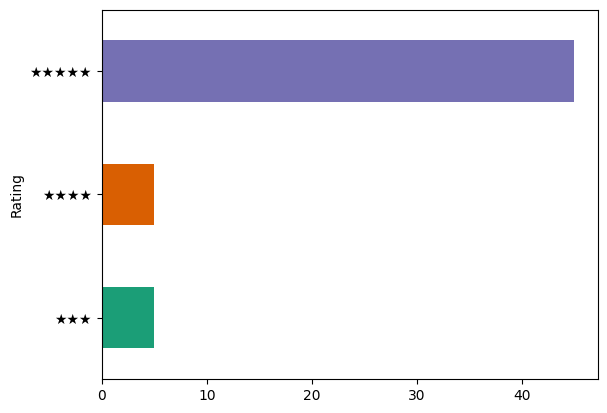

In [ ]:
df.groupby('Rating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

**Load**
*   *Convert to CSV*
*   *Store to S3*



In [ ]:
df.to_csv('Letterboxd_Reviews.csv')

In [ ]:
!pip install boto3
import boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 5.4 MB/s eta 0:00:00


In [ ]:
shell

In [ ]:
!aws configure

/bin/bash: line 1: aws: command not found


In [ ]:
s3 = boto3.client('s3')

In [ ]:
s3.upload_file('Letterboxd_Reviews.csv','letterboxd-review','Letterboxd_Reviews.csv')